In [3]:
import json
import pandas as pd
import os
import json5
from graph_construction.qp.visitor.DefaultVisitor import DefaultVisitor
from graph_construction.qp.visitor.AbstractVisitor import dispatch

In [4]:
from inductive_query.utils import *
from inductive_query.result_processor import *

In [5]:
import pathlib
name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}

In [6]:

from inductive_query.res_proc_helper import *
import importlib
import inductive_query.utils as ih
importlib.reload(ih)
CompletelyUnseenQueryExtractor = ih.CompletelyUnseenQueryExtractor


In [7]:
import inductive_query.res_proc_helper as help
importlib.reload(help)
name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}
get_completely_unseen_r_processor= help.get_completely_unseen_r_processor

# Property Path (PP) Alone

In [8]:
import pathlib
import importlib
from inductive_query.result_processor import ResultProcessor
import inductive_query.pp_qextr as pp_qextr
importlib.reload(pp_qextr)
PPQueryExtractor = pp_qextr.PPQueryExtractor

def get_PP_result_processor(dataset_path, pred_path, split_path, name_dict, approach_name,apply_cls_func=None, split_type='test', remove_lsq=20):
    ext = PPQueryExtractor(dataset_path)
    #ext.set_test_pp()
    match split_type:
        case 'test':
            unseen_pred_queryID =[pathlib.Path(x).name for x in ext.get_test_PP_files()]
        case 'train':
            unseen_pred_queryID =[pathlib.Path(x).name for x in ext.get_train_PP_files()]
        case 'val':
            unseen_pred_queryID =[pathlib.Path(x).name for x in ext.get_val_PP_files()]
    p = ResultProcessor(pred_path, approach_name=approach_name,apply_cls_func=apply_cls_func)
    p.retain_path(split_path, remove_prefix=20)
    p.retain_ids(unseen_pred_queryID)
    print("PP predicate")
    print(p.confusion_matrix_to_latex_row_wise(name_dict=name_dict))
    print(p.confusion_matrix_to_latex(row_percentage=False,name_dict=name_dict))
    return p

In [115]:
name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}
path = '/data/wikidata_0_1_10_v3_path_weight_loss_retrain'
path = '/data/wikidata_0_1_10_v3_path_weight_loss_PPSynth'
path = '/data/wikidatav3_path_PPrepV2'
pred_path = '/data/wikidatav3_path_PPrepV2/planrgcn9_4_2024/test_pred.csv'
pred_path = '/data/wikidatav3_path_PPrepV2/planrgcn10_4_2024/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"
#DBpedia_PP = get_result_processor(pred_path, split_path, name_dict, "PlanRGCN Wikidata")
DBpedia_PP = get_PP_result_processor(path, pred_path, split_path, name_dict, "PlanRGCN Wikidata", remove_lsq=-1)
DBpedia_PP.class_wise_metrics_for_table()

PP predicate
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 73.15 & 25.54 & 1.31 \\
1s to 10s & 2.41 & 97.59 & 0.00 \\
$>$ 10s & 7.04 & 80.28 & 12.68 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 782 & 273 & 14 \\
1s to 10s & 2 & 81 & 0 \\
$>$ 10s & 5 & 57 & 9 \\
\bottomrule
\end{tabular}



({'0s-1s': '0.84/0.99/0.73',
  '1s-10s': '0.33/0.20/0.98',
  '10s-∞': '0.19/0.39/0.13'},
 ['F1', 'Precision', 'Recall'])

In [10]:
DBpedia_PP.df

,id,time_cls,planrgcn_prediction
0,lsqQuery-1UKvMdn6rcrVI7xh35Hx3uf-1Gd_MkCRpksna...,0,0
1,additionalWikidata18142zeroOrMore,2,1
2,lsqQuery-FghYsaJkRwKckopveSkgh2GH4nx2yoCj9qadY...,0,0
3,lsqQuery-quQumK5nODAkz72zCWZ1fnAm0f29gLRvAlg-Z...,0,0
4,lsqQuery-f9HGEJppGmZyIFdG7CfC9H7ZmtqTfmtkt2Mqy...,0,1
...,...,...,...
1218,lsqQuery-Io4PAxL0f7hvBrWtzclsw8YRqfZYhfXGhxGfA...,0,0
1219,lsqQuery-O3uEyenf1Omnjkr_6yo0MsVFB8oJSRFfL5pAl...,0,0
1220,lsqQuery-7JToqp1PmEy-35kgtNGxt8957WHy5C1L2eSrp...,0,0
1221,lsqQuery-KbXqo9tZzdcChUx7lFW2045mhqEYO92rbFfA7...,0,0


In [78]:
DBpedia_PP.df['id'].describe()

count                                                  1223
unique                                                 1223
top       lsqQuery-1UKvMdn6rcrVI7xh35Hx3uf-1Gd_MkCRpksna...
freq                                                      1
Name: id, dtype: object

In [141]:
wikidata_slow = DBpedia_PP.df[(DBpedia_PP.df['time_cls'] == 2)]
wikidata_med = DBpedia_PP.df[(DBpedia_PP.df['time_cls'] == 1)]

In [79]:
wikidata_slow_as_med = DBpedia_PP.df[(DBpedia_PP.df['time_cls'] == 2) & (DBpedia_PP.df['planrgcn_prediction'] ==1)]

In [12]:
list(wikidata_slow_as_med['id'])

['additionalWikidata18142zeroOrMore',
 'lsqQuery-Ss8vd7s1BOkCEObxvlUyhkaGOfFy9k13u-985opDbQ4zeroOrMore',
 'lsqQuery-JB5bmByHSTKeR1N1xe-OrSf18An6inbK2qVmUIOnou4',
 'additionalWikidata15894',
 'lsqQuery-dLebv07PSe93U4Lb7OEIzBL-53law0oPt094p411Hdk',
 'lsqQuery-vEsjGHvLsRcXk_JaPoGlgwhP2sRyZaJ2nuGIEzuX8xkzeroOrMore',
 'lsqQuery-yp8yaz3f9mS9SX9bFPxwO_raOy9l9nADanmm48KyIwkzeroOrMore',
 'additionalWikidata16979zeroOrMore',
 'lsqQuery-Bora93f3jDzVUWuV-8ITcEf3fz0X1OeAsLXCwFChhRAzeroOrMore',
 'lsqQuery-Qmag8tG9Hhw1CYNHVSkRg1uza07QqL_TXyifuXCTo18zeroOrMore',
 'additionalWikidata16855zeroOrMore',
 'lsqQuery-l-la-UzTB1VQKQBKZ-wrFvjXEcP_Ch_HF8E26oRu0s0zeroOrMore',
 'additionalWikidata15328',
 'lsqQuery-Liauec2mZPstc0Y2PgVB8HHmowD_ObGq_QF92LciKXszeroOrMore',
 'lsqQuery-3rfzvlzvT1UbiQQsh1KLryennG2ZacuGhLX3kZa464U',
 'additionalWikidata18085',
 'lsqQuery-HFrCR7vOUZrfQeM3QTGQJa7qu6AZk61CUb_Nht84660',
 'lsqQuery-GpgYREGwSo6PR8OTUhPYA-yb2_WA2dt488NY9VpfX3czeroOrMore',
 'lsqQuery-MrjkzMrjazsUfwzv3Y9_GJghA2s

In [80]:
wikidata_slow_as_slow = DBpedia_PP.df[(DBpedia_PP.df['time_cls'] == 2) & (DBpedia_PP.df['planrgcn_prediction'] ==2)]

In [81]:
set(wikidata_slow_as_slow['id']).intersection(set(wikidata_slow_as_med['id']))

set()

In [82]:
list(wikidata_slow_as_slow['id'])

['additionalWikidata12599',
 'lsqQuery-dl7fh0eFQ-xynyqrYIMcgqwcjJ4V2B6TbbtFYCLwIwgzeroOrMore',
 'additionalWikidata17192',
 'additionalWikidata31482zeroOrMore',
 'additionalWikidata8784',
 'additionalWikidata40109zeroOrMore',
 'additionalWikidata108216oneOrMore',
 'lsqQuery-XGiEdAkmMikm0Ox7dYnlNhEENRuJgrxKIBBSYRrNYYQzeroOrMore',
 'additionalWikidata117689zeroOrMore',
 'additionalWikidata11356zeroOrMore',
 'additionalWikidata40109',
 'additionalWikidata32226']

In [84]:
wikidata_med_as_med = DBpedia_PP.df[(DBpedia_PP.df['time_cls'] == 1) & (DBpedia_PP.df['planrgcn_prediction'] ==1)]
list(wikidata_med_as_med['id'])

['additionalWikidata17274zeroOrMore',
 'lsqQuery-XK_b3tqa1Oyn2BK2g93igeExmYoLDXUTkg3_HjK6ISc',
 'lsqQuery-stAEcF72vTSMdqB-n6cTC-k5yr_CMSrHZBLqdi96Vo0',
 'additionalWikidata13373zeroOrMore',
 'lsqQuery-gqn1hVsOO9o9ed-fZtMn2q5FMhfoHvfVUqjDFLguYY8',
 'lsqQuery-ww00qeGg5FZAG1o9Vk9tiCnDV4dUi71IRjbb5STeY8cmanual_process',
 'lsqQuery-Ysiq9RhljTxOWVE0wfIXWzAKNJau0utnqeEF8jds9BE',
 'additionalWikidata17136',
 'lsqQuery-JfXoEGaiKAm8Ip3h0J0apruEZmdvSk8nFSt4Jne-JqozeroOrMore',
 'additionalWikidata80750zeroOrMore',
 'lsqQuery-7Dyk66K2QX6EJ5BCIkQ_376qUguXnyBRRmKfd-VUuIEzeroOrMore',
 'additionalWikidata15690zeroOrMore',
 'lsqQuery-CvRKR-F2bi80GxxFI8BDMX2ABDubTotoEG0sAwDcEN4',
 'additionalWikidata15861',
 'additionalWikidata18693zeroOrMore',
 'lsqQuery-ioYLAFNVUtbBnqyczAy7mRRYnok1X9waztr7wAGszPMzeroOrMore',
 'lsqQuery-NWaUSG4kT9vidCqF5oax8rNsbmO0f8oNRQ0YYoHzzA8',
 'lsqQuery-x8VcqNJStUZz3NtIDk1DKY8oRnnad7Y1WT0lRWX2XJEmanual_process',
 'lsqQuery-DScRBD6FfCIVpjB6Khj9YoVMMV-_vdsvYVH_ApwhG6omanual_process'

In [85]:
def merge_mean_latency(resultProcessor, path):
    df = pd.read_csv(path, sep='\t')
    df['id'] = df['id'].apply(lambda x: x[20:])
    return pd.merge(resultProcessor.df, df[['id', 'mean_latency']], on='id', how='left')

In [170]:
import pickle as pcl
with open('/data/wikidatav3_path_PPrepV2/planrgcn9_4_2024/prepper.pcl','rb') as f:
    prepper = pcl.load(f)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.3.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator KBinsDiscretizer from version 1.3.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [171]:
ent_freq = prepper.feat.ent_freq
pred_freq = prepper.feat.pred_freq

In [172]:
import probe.utils as pu
import importlib
importlib.reload(pu)

<module 'probe.utils' from '/data/probe/probe/utils.py'>

In [173]:
pu.extract_pred_ents('/data/wikidatav3_path_PPrepV2/queryplans/additionalWikidata18142zeroOrMore')

(['http://www.wikidata.org/prop/direct/P31',
  'http://www.wikidata.org/prop/direct/P279'],
 ['http://www.wikidata.org/entity/Q223557'])

In [174]:
med_true_preds = pd.Series(pu.flatten([pu.extract_pred_ents(f'/data/wikidatav3_path_PPrepV2/queryplans/{x}')[0] for x in list(wikidata_med_as_med['id'])]))
med_true_preds.describe()

count                                         247
unique                                         40
top       http://www.wikidata.org/prop/direct/P31
freq                                           74
dtype: object

In [175]:
med_true_preds.value_counts()

http://www.wikidata.org/prop/direct/P31       74
http://www.wikidata.org/prop/direct/P279      67
http://www.wikidata.org/prop/direct/P131      16
http://www.wikidata.org/prop/direct/P625      13
http://www.w3.org/2000/01/rdf-schema#label    10
http://www.wikidata.org/prop/direct/P17        6
http://www.wikidata.org/prop/direct/P580       5
http://www.wikidata.org/prop/direct/P585       5
http://www.wikidata.org/prop/direct/P1566      4
http://www.wikidata.org/prop/direct/P106       3
http://www.wikidata.org/prop/direct/P27        3
http://www.wikidata.org/prop/direct/P171       3
http://www.wikidata.org/prop/direct/P1448      2
http://www.wikidata.org/prop/direct/P2452      2
http://www.wikidata.org/prop/direct/P105       2
http://www.wikidata.org/prop/direct/P18        2
http://www.wikidata.org/prop/direct/P1549      2
http://www.wikidata.org/prop/direct/P94        2
http://www.wikidata.org/prop/direct/P856       2
http://www.wikidata.org/prop/direct/P509       2
http://www.wikidata.

In [176]:
slow_true_preds = pd.Series(pu.flatten([pu.extract_pred_ents(f'/data/wikidatav3_path_PPrepV2/queryplans/{x}')[0] for x in list(wikidata_slow_as_slow['id'])]))
slow_true_preds.describe()

count                                          41
unique                                         13
top       http://www.wikidata.org/prop/direct/P31
freq                                           12
dtype: object

In [177]:
slow_true_preds.value_counts()

http://www.wikidata.org/prop/direct/P31      12
http://www.wikidata.org/prop/direct/P279     10
http://www.wikidata.org/prop/direct/P18       3
http://www.wikidata.org/prop/direct/P180      3
http://www.wikidata.org/prop/direct/P921      2
http://www.wikidata.org/prop/direct/P1260     2
http://www.wikidata.org/prop/direct/P625      2
http://www.wikidata.org/prop/direct/P1476     2
http://www.wikidata.org/prop/direct/P345      1
http://www.wikidata.org/prop/direct/P105      1
http://www.wikidata.org/prop/direct/P361      1
http://www.wikidata.org/prop/direct/P171      1
http://www.wikidata.org/prop/direct/P249      1
Name: count, dtype: int64

In [178]:
slow_med_preds = pd.Series(pu.flatten([pu.extract_pred_ents(f'/data/wikidatav3_path_PPrepV2/queryplans/{x}')[0] for x in list(wikidata_slow_as_med['id'])]))
slow_med_preds.describe()

count                                          133
unique                                          23
top       http://www.wikidata.org/prop/direct/P279
freq                                            52
dtype: object

In [179]:
slow_med_preds.value_counts()

http://www.wikidata.org/prop/direct/P279      52
http://www.wikidata.org/prop/direct/P31       51
http://www.wikidata.org/prop/direct/P625       7
http://www.wikidata.org/prop/direct/P17        2
http://www.wikidata.org/prop/direct/P1448      2
http://www.w3.org/2000/01/rdf-schema#label     2
http://www.wikidata.org/prop/direct/P585       1
http://www.wikidata.org/prop/direct/P1559      1
http://www.wikidata.org/prop/direct/P407       1
http://www.wikidata.org/prop/direct/P276       1
http://www.wikidata.org/prop/direct/P571       1
http://www.wikidata.org/prop/direct/P576       1
http://www.wikidata.org/prop/direct/P582       1
http://www.wikidata.org/prop/direct/P150       1
http://www.wikidata.org/prop/direct/P580       1
http://www.wikidata.org/prop/direct/P131       1
http://www.wikidata.org/prop/direct/P39        1
http://www.wikidata.org/prop/direct/P364       1
http://www.wikidata.org/prop/direct/P1566      1
http://www.wikidata.org/prop/direct/P2452      1
http://www.wikidata.

In [180]:
[x for x in list(slow_med_preds) if x not in list(med_true_preds)]

['http://www.wikidata.org/prop/direct/P2590',
 'http://www.wikidata.org/prop/direct/P379',
 'http://www.wikidata.org/prop/direct/P39',
 'http://www.wikidata.org/prop/direct/P582',
 'http://www.wikidata.org/prop/direct/P576',
 'http://www.wikidata.org/prop/direct/P571',
 'http://www.wikidata.org/prop/direct/P276',
 'http://www.wikidata.org/prop/direct/P407']

In [181]:
len([x for x in list(slow_med_preds) if x in list(med_true_preds)])

125

In [182]:
set(wikidata_slow_as_med['id']).intersection(set(list(wikidata_med_as_med['id'])))

set()

In [183]:
import probe.utils as pu
import importlib
importlib.reload(pu)
sim_ents, sim_preds = pu.extract_similar_query('/data/wikidatav3_path_PPrepV2/queryplans',list(wikidata_slow_as_med['id']),list(wikidata_med_as_med['id']))

In [184]:
len(sim_preds)

1570

In [185]:
sim_ents

[('additionalWikidata16855zeroOrMore', 'additionalWikidata18693zeroOrMore'),
 ('additionalWikidata16855zeroOrMore', 'additionalWikidata18729zeroOrMore'),
 ('additionalWikidata16855zeroOrMore', 'additionalWikidata18729'),
 ('additionalWikidata16855zeroOrMore', 'additionalWikidata19141zeroOrMore'),
 ('additionalWikidata16855zeroOrMore', 'additionalWikidata19139'),
 ('lsqQuery-l-la-UzTB1VQKQBKZ-wrFvjXEcP_Ch_HF8E26oRu0s0zeroOrMore',
  'additionalWikidata18693zeroOrMore'),
 ('lsqQuery-l-la-UzTB1VQKQBKZ-wrFvjXEcP_Ch_HF8E26oRu0s0zeroOrMore',
  'additionalWikidata18729zeroOrMore'),
 ('lsqQuery-l-la-UzTB1VQKQBKZ-wrFvjXEcP_Ch_HF8E26oRu0s0zeroOrMore',
  'additionalWikidata18729'),
 ('lsqQuery-l-la-UzTB1VQKQBKZ-wrFvjXEcP_Ch_HF8E26oRu0s0zeroOrMore',
  'additionalWikidata19141zeroOrMore'),
 ('lsqQuery-l-la-UzTB1VQKQBKZ-wrFvjXEcP_Ch_HF8E26oRu0s0zeroOrMore',
  'additionalWikidata19139'),
 ('lsqQuery-3rfzvlzvT1UbiQQsh1KLryennG2ZacuGhLX3kZa464U',
  'lsqQuery-WenMbOTdmb6XQZ7ZGPHLKyUnyufV1PyRuDAhsfv2IPk')

In [186]:
set(wikidata_slow_as_med['id'])
set(wikidata_med_as_med['id'])
set(wikidata_slow_as_slow['id'])

{'additionalWikidata108216oneOrMore',
 'additionalWikidata11356zeroOrMore',
 'additionalWikidata117689zeroOrMore',
 'additionalWikidata12599',
 'additionalWikidata17192',
 'additionalWikidata31482zeroOrMore',
 'additionalWikidata32226',
 'additionalWikidata40109',
 'additionalWikidata40109zeroOrMore',
 'additionalWikidata8784',
 'lsqQuery-XGiEdAkmMikm0Ox7dYnlNhEENRuJgrxKIBBSYRrNYYQzeroOrMore',
 'lsqQuery-dl7fh0eFQ-xynyqrYIMcgqwcjJ4V2B6TbbtFYCLwIwgzeroOrMore'}

In [187]:
import probe.utils as pu
import importlib
importlib.reload(pu)
basepath='/data/wikidatav3_path_PPrepV2/queryplans'
print("Filters in Accurate med interval: ", len(pu.extract_filters(basepath,set(wikidata_med_as_med['id']))), " of ",len(set(wikidata_med_as_med['id'])))
print("Filters in Accurate slow interval: ", len(pu.extract_filters(basepath,set(wikidata_slow_as_slow['id']))) , " of ",len(set(wikidata_slow_as_slow['id'])))
print("Filters in Slow as Med interval: ", len(pu.extract_filters(basepath,set(wikidata_slow_as_med['id']))) , " of ",len(set(wikidata_slow_as_med['id'])))

Filters in Accurate med interval:  15  of  81
Filters in Accurate slow interval:  0  of  12
Filters in Slow as Med interval:  4  of  54


In [188]:
set(wikidata_slow_as_med['id'])

{'additionalWikidata15328',
 'additionalWikidata15328zeroOrMore',
 'additionalWikidata15817zeroOrMore',
 'additionalWikidata15894',
 'additionalWikidata16827',
 'additionalWikidata16855',
 'additionalWikidata16855zeroOrMore',
 'additionalWikidata16859',
 'additionalWikidata16979zeroOrMore',
 'additionalWikidata16984',
 'additionalWikidata17080oneOrMore',
 'additionalWikidata18085',
 'additionalWikidata18142zeroOrMore',
 'additionalWikidata18197',
 'additionalWikidata18197zeroOrMore',
 'additionalWikidata25611',
 'additionalWikidata37378zeroOrMore',
 'additionalWikidata42315zeroOrMore',
 'additionalWikidata7589',
 'additionalWikidata78915zeroOrMore',
 'additionalWikidata80722zeroOrMore',
 'additionalWikidata99469zeroOrMore',
 'lsqQuery-3DXz1SbkrwHCwCYRXldilL1WBnkfSLVKtQjycOpEIHk',
 'lsqQuery-3rfzvlzvT1UbiQQsh1KLryennG2ZacuGhLX3kZa464U',
 'lsqQuery-AAdYsegNppaQiPfldd65ma8ZIRMZqBxKzDw17iBiNPIzeroOrMore',
 'lsqQuery-Bora93f3jDzVUWuV-8ITcEf3fz0X1OeAsLXCwFChhRAzeroOrMore',
 'lsqQuery-GpgYREG

In [189]:
set(wikidata_med_as_med['id'])

{'additionalWikidata108597zeroOrMore',
 'additionalWikidata122100oneOrMore',
 'additionalWikidata13373zeroOrMore',
 'additionalWikidata15690',
 'additionalWikidata15690zeroOrMore',
 'additionalWikidata15861',
 'additionalWikidata16506',
 'additionalWikidata16689',
 'additionalWikidata16829',
 'additionalWikidata16829zeroOrMore',
 'additionalWikidata17136',
 'additionalWikidata17162',
 'additionalWikidata17274',
 'additionalWikidata17274zeroOrMore',
 'additionalWikidata18693zeroOrMore',
 'additionalWikidata18729',
 'additionalWikidata18729zeroOrMore',
 'additionalWikidata19139',
 'additionalWikidata19141zeroOrMore',
 'additionalWikidata321',
 'additionalWikidata53060zeroOrMore',
 'additionalWikidata80750zeroOrMore',
 'lsqQuery-1If0LmyDz1RJcwETksxK2A_a-4q9i8xjXxXS8vSAOjM',
 'lsqQuery-3Q-P-d42C8a3bfmGN7akjMpHiECVt5ieOnB7wg9rfTwzeroOrMore',
 'lsqQuery-3RGwoummL5cSprahoRF9mI7BdM-3dpt24bRxkwh7WgQ',
 'lsqQuery-3rfzvlzvT1UbiQQsh1KLryennG2ZacuGhLX3kZa464Umanual_process',
 'lsqQuery-4A7e1g2G6Ag7

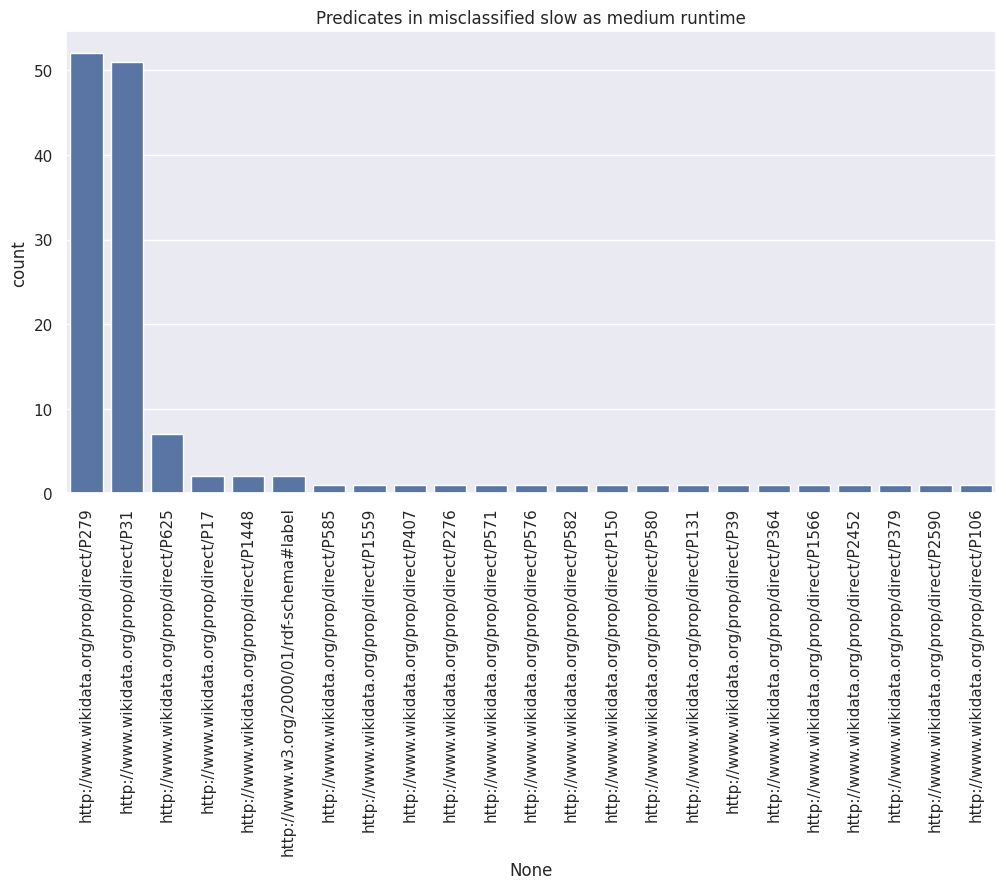

In [210]:
#Plot of frequency of predicate in slow pp query predicated as mediun
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=slow_med_preds.value_counts().index, y=slow_med_preds.value_counts(), ax=ax)
ax.tick_params(axis='x', labelrotation=90)
plt.title('Predicates in misclassified slow as medium runtime')
plt.show()

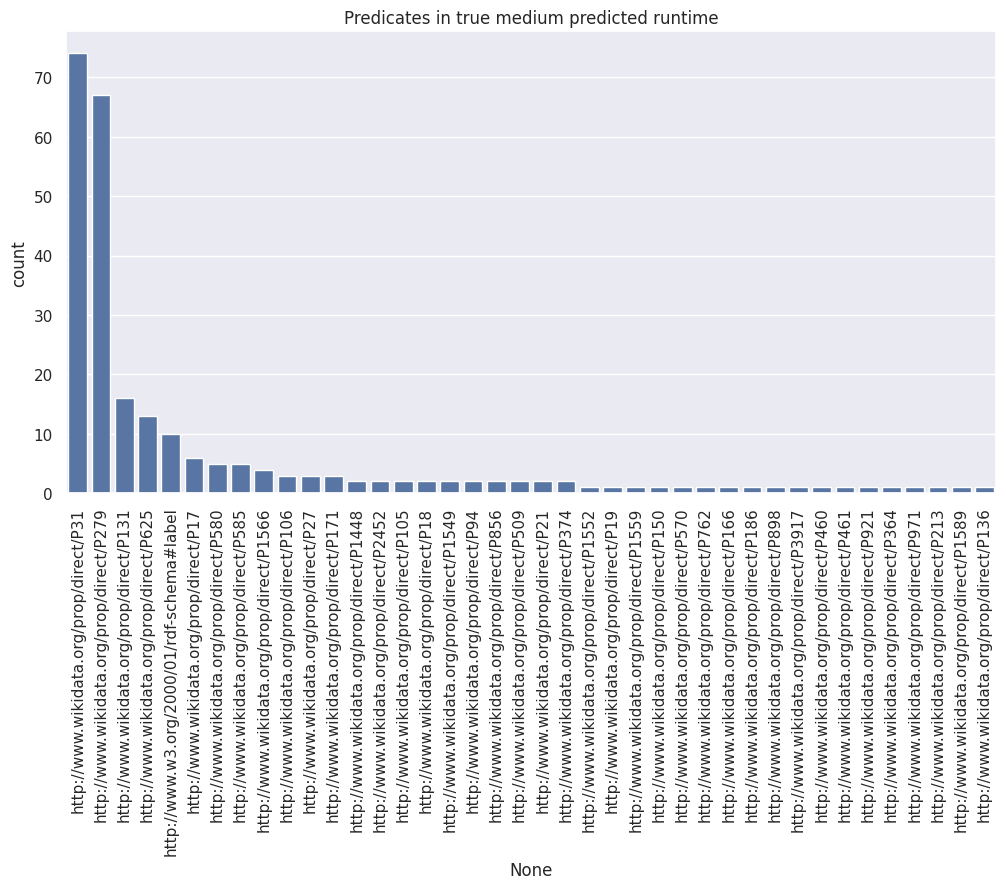

In [212]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=med_true_preds.value_counts().index, y=med_true_preds.value_counts(), ax=ax)
ax.tick_params(axis='x', labelrotation=90)
plt.title('Predicates in true medium predicted runtime')
plt.show()

### Entities

In [125]:
med_true_ents = pd.Series(pu.flatten([pu.extract_pred_ents(f'/data/wikidatav3_path_PPrepV2/queryplans/{x}')[1] for x in list(wikidata_med_as_med['id'])]))
med_true_ents.describe()

count                                    119
unique                                    77
top       http://www.wikidata.org/entity/Q55
freq                                       5
dtype: object

In [126]:
med_true_ents.value_counts()

http://www.wikidata.org/entity/Q55          5
http://www.wikidata.org/entity/Q1190554     5
http://www.wikidata.org/entity/Q5           4
http://www.wikidata.org/entity/Q39715       4
http://www.wikidata.org/entity/Q13100073    4
                                           ..
http://www.wikidata.org/entity/Q860861      1
http://www.wikidata.org/entity/Q7397        1
http://www.wikidata.org/entity/Q202064      1
http://www.wikidata.org/entity/Q21208       1
http://www.wikidata.org/entity/Q11348       1
Name: count, Length: 77, dtype: int64

In [128]:
slow_true_ents = pd.Series(pu.flatten([pu.extract_pred_ents(f'/data/wikidatav3_path_PPrepV2/queryplans/{x}')[1] for x in list(wikidata_slow_as_slow['id'])]))
slow_true_ents.describe()

count                                          14
unique                                          8
top       http://www.wikidata.org/entity/Q3305213
freq                                            3
dtype: object

In [130]:
slow_true_ents.value_counts()

http://www.wikidata.org/entity/Q3305213    3
http://www.wikidata.org/entity/Q34379      3
http://www.wikidata.org/entity/Q732577     2
http://www.wikidata.org/entity/Q1055       2
http://www.wikidata.org/entity/Q29         1
http://www.wikidata.org/entity/Q16521      1
http://www.wikidata.org/entity/Q95074      1
http://www.wikidata.org/entity/Q5          1
Name: count, dtype: int64

In [131]:
slow_med_ents = pd.Series(pu.flatten([pu.extract_pred_ents(f'/data/wikidatav3_path_PPrepV2/queryplans/{x}')[1] for x in list(wikidata_slow_as_med['id'])]))
slow_med_ents.describe()

count                                        59
unique                                       46
top       http://www.wikidata.org/entity/Q15284
freq                                          3
dtype: object

In [132]:
slow_med_ents.value_counts()

http://www.wikidata.org/entity/Q15284       3
http://www.wikidata.org/entity/Q4830453     3
http://www.wikidata.org/entity/Q1190554     3
http://www.wikidata.org/entity/Q1914636     2
http://www.wikidata.org/entity/Q3305213     2
http://www.wikidata.org/entity/Q286583      2
http://www.wikidata.org/entity/Q5           2
http://www.wikidata.org/entity/Q16970       2
http://www.wikidata.org/entity/Q8148        2
http://www.wikidata.org/entity/Q43229       2
http://www.wikidata.org/entity/Q23397       1
http://www.wikidata.org/entity/Q2221906     1
http://www.wikidata.org/entity/Q2424752     1
http://www.wikidata.org/entity/Q729         1
http://www.wikidata.org/entity/Q386724      1
http://www.wikidata.org/entity/Q223557      1
http://www.wikidata.org/entity/Q5358404     1
http://www.wikidata.org/entity/Q13442814    1
http://www.wikidata.org/entity/Q483501      1
http://www.wikidata.org/entity/Q183         1
http://www.wikidata.org/entity/Q46622       1
http://www.wikidata.org/entity/Q90

In [135]:
print(set([x for x in list(slow_med_ents) if x in list(med_true_ents)]))
print(set([x for x in list(slow_med_ents) if x in list(slow_true_ents)]))

{'http://www.wikidata.org/entity/Q40', 'http://www.wikidata.org/entity/Q486972', 'http://www.wikidata.org/entity/Q11424', 'http://www.wikidata.org/entity/Q1197', 'http://www.wikidata.org/entity/Q5', 'http://www.wikidata.org/entity/Q901', 'http://www.wikidata.org/entity/Q82794', 'http://www.wikidata.org/entity/Q1190554', 'http://www.wikidata.org/entity/Q16970'}
{'http://www.wikidata.org/entity/Q3305213', 'http://www.wikidata.org/entity/Q5'}


In [138]:
print(len([x for x in list(slow_med_ents) if x in list(med_true_ents)]))
print(len([x for x in list(slow_med_ents) if x in list(slow_true_ents)]))
print(len(list(slow_med_ents)))

13
4
59


In [139]:
len(set(wikidata_slow_as_med['id']).intersection(set(wikidata_med_as_med['id'])))

0

In [140]:
len(set(wikidata_slow_as_med['id']))

54

In [142]:
act_med_preds = pd.Series(pu.flatten([pu.extract_pred_ents(f'/data/wikidatav3_path_PPrepV2/queryplans/{x}')[0] for x in list(wikidata_med['id'])]))
act_med_preds.describe()

count                                         253
unique                                         40
top       http://www.wikidata.org/prop/direct/P31
freq                                           76
dtype: object

In [144]:
act_med_ents = pd.Series(pu.flatten([pu.extract_pred_ents(f'/data/wikidatav3_path_PPrepV2/queryplans/{x}')[1] for x in list(wikidata_med['id'])]))
act_med_ents.describe()

count                                         121
unique                                         78
top       http://www.wikidata.org/entity/Q1190554
freq                                            5
dtype: object

In [143]:
act_slow_preds = pd.Series(pu.flatten([pu.extract_pred_ents(f'/data/wikidatav3_path_PPrepV2/queryplans/{x}')[0] for x in list(wikidata_slow['id'])]))
act_slow_preds.describe()

count                                          191
unique                                          38
top       http://www.wikidata.org/prop/direct/P279
freq                                            67
dtype: object

In [146]:
act_slow_ents = pd.Series(pu.flatten([pu.extract_pred_ents(f'/data/wikidatav3_path_PPrepV2/queryplans/{x}')[1] for x in list(wikidata_slow['id'])]))
act_slow_ents.describe()

count                                          78
unique                                         56
top       http://www.wikidata.org/entity/Q3305213
freq                                            5
dtype: object

In [148]:
print("slow PP ent in med ", len(set([x for x in list(act_slow_ents) if x in list(act_med_ents)])))

slow PP ent in med  10


In [149]:
print("med PP ent in slow ", len(set([x for x in list(act_med_ents) if x in list( act_slow_ents  )])))

med PP ent in slow  10


In [150]:
print("med PP rel in slow ", len(set([x for x in list(act_med_preds) if x in list( act_slow_preds  )])))

med PP rel in slow  20


In [151]:
print("slow PP rel in med ", len(set([x for x in list(act_slow_preds) if x in list(  act_med_preds )])))

slow PP rel in med  20


In [169]:
def get_val(dct, x):
    try:
        return int(dct[x])
    except:
        return 0
np.sum([get_val(ent_freq,x) for x in set(list(act_med_ents))])/len([get_val(ent_freq,x) for x in set(list(act_med_ents))])

10.012820512820513

In [162]:
set(list(act_med_ents))

{'http://www.wikidata.org/entity/Q102496',
 'http://www.wikidata.org/entity/Q1028181',
 'http://www.wikidata.org/entity/Q1030034',
 'http://www.wikidata.org/entity/Q108053',
 'http://www.wikidata.org/entity/Q11173',
 'http://www.wikidata.org/entity/Q11348',
 'http://www.wikidata.org/entity/Q11424',
 'http://www.wikidata.org/entity/Q1190554',
 'http://www.wikidata.org/entity/Q1197',
 'http://www.wikidata.org/entity/Q12280',
 'http://www.wikidata.org/entity/Q1248784',
 'http://www.wikidata.org/entity/Q13100073',
 'http://www.wikidata.org/entity/Q142',
 'http://www.wikidata.org/entity/Q145',
 'http://www.wikidata.org/entity/Q151885',
 'http://www.wikidata.org/entity/Q15630906',
 'http://www.wikidata.org/entity/Q16970',
 'http://www.wikidata.org/entity/Q17',
 'http://www.wikidata.org/entity/Q17149090',
 'http://www.wikidata.org/entity/Q182060',
 'http://www.wikidata.org/entity/Q191067',
 'http://www.wikidata.org/entity/Q1931388',
 'http://www.wikidata.org/entity/Q19770',
 'http://www.wikid

In [159]:
[get_val(pred_freq,x) for x in set(list(act_med_preds))]

['1163098',
 '10596985',
 '3082525',
 '127926',
 '7306278',
 '8657168',
 '487',
 '264237',
 '2807145',
 '1417500',
 '41412',
 '19178',
 '13997088',
 '14675278',
 '3127958',
 '3702415',
 '49936',
 '1028901',
 '95752854',
 '617903',
 '1323072',
 '1501028',
 '8531447',
 '3092764',
 '574',
 '2574835',
 '4604',
 '1433403',
 '328947',
 '26235',
 '109280',
 '820781',
 '4097492',
 '3872749',
 '548938',
 '1152120',
 '203',
 '39177',
 '2163949',
 0]

In [160]:
[get_val(pred_freq,x) for x in set(list(act_slow_preds))]

['1209',
 '10596985',
 '577302',
 '3082525',
 '3901672',
 '8657168',
 0,
 '545090',
 '1417500',
 '40911614',
 '13997088',
 '14675278',
 '1135',
 '3127958',
 '3702415',
 '13892606',
 '1028901',
 '213757',
 '95752854',
 '617903',
 '1501028',
 '8531447',
 '3092764',
 '574',
 0,
 '2123491',
 '760597',
 '1118353',
 0,
 '328947',
 '18900',
 '820781',
 '164036',
 '3872749',
 '44',
 '548938',
 0,
 '2281276']

In [161]:
ent_freq

{'http://www.wikidata.org/entity/Q30888275': '21',
 'http://www.wikidata.org/entity/Q4287131': '19',
 'http://www.wikidata.org/entity/Q20113337': '5',
 'http://www.wikidata.org/entity/Q508846': '951',
 'http://www.wikidata.org/entity/Q24937019': '6',
 'http://www.wikidata.org/entity/Q71175129': '10',
 'http://www.wikidata.org/entity/Q63344871': '4',
 'http://www.wikidata.org/entity/Q1133502': '27',
 'http://www.wikidata.org/entity/Q24936786': '15',
 'http://www.wikidata.org/entity/Q33231': '54414',
 'http://www.wikidata.org/entity/Q176834': '59',
 'http://www.wikidata.org/entity/Q4287068': '18',
 'http://www.wikidata.org/entity/Q48898139': '13',
 'http://www.wikidata.org/entity/Q4287017': '18',
 'http://www.wikidata.org/entity/Q5619237': '9',
 'http://www.wikidata.org/entity/Q11402769': '9',
 'http://www.wikidata.org/entity/Q376834': '50',
 'http://www.wikidata.org/entity/Q154590': '154',
 'http://www.wikidata.org/entity/Q4286871': '19',
 'http://www.wikidata.org/entity/Q42973': '52620